In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
df = pd.read_csv("accidents_2016.csv", index_col=0)

In [3]:
df.head()

,state_number,state_name,consecutive_number,number_of_vehicle_forms_submitted_all,number_of_motor_vehicles_in_transport_mvit,number_of_parked_working_vehicles,number_of_forms_submitted_for_persons_not_in_motor_vehicles,number_of_persons_not_in_motor_vehicles_in_transport_mvit,number_of_persons_in_motor_vehicles_in_transport_mvit,number_of_forms_submitted_for_persons_in_motor_vehicles,...,minute_of_ems_arrival_at_hospital,related_factors_crash_level_1,related_factors_crash_level_1_name,related_factors_crash_level_2,related_factors_crash_level_2_name,related_factors_crash_level_3,related_factors_crash_level_3_name,number_of_fatalities,number_of_drunk_drivers,timestamp_of_crash
0,24,Maryland,240002,1,1,0,1,1,1,1,...,99,0,None,0,None,0,None,1,0,2016-02-21 13:39:00+00:00
1,16,Idaho,160197,1,1,0,0,0,1,1,...,88,0,None,0,None,0,None,1,0,2016-10-28 10:02:00+00:00
2,16,Idaho,160219,1,1,0,0,0,3,3,...,99,0,None,0,None,0,None,1,0,2016-12-03 11:31:00+00:00
3,16,Idaho,160207,1,1,0,0,0,3,3,...,99,0,None,0,None,0,None,1,0,2016-11-30 14:28:00+00:00
4,32,Nevada,320145,1,1,0,0,0,1,1,...,99,0,None,0,None,0,None,1,1,2016-07-13 17:45:00+00:00


In [4]:
columns = ['state_number',
            'state_name',
            'county',
            'city',
            'day_of_crash',
            'month_of_crash',
            'year_of_crash',
            'day_of_week',
            'hour_of_crash',
            'minute_of_crash',
            'national_highway_system',
            'land_use_name',
            'route_signing_name',
            'trafficway_identifier',
            'trafficway_identifier_2',
            'milepoint',
            'latitude',
            'longitude',
            'special_jurisdiction_name',
            'manner_of_collision_name',
            'relation_to_junction_within_interchange_area',
            'relation_to_junction_specific_location_name',
            'type_of_intersection',
            'work_zone',
            'relation_to_trafficway_name',
            'number_of_fatalities',
            'number_of_drunk_drivers',
            'timestamp_of_crash'
          ]

In [5]:
df = df[columns]

In [6]:
df.head()

,state_number,state_name,county,city,day_of_crash,month_of_crash,year_of_crash,day_of_week,hour_of_crash,minute_of_crash,...,special_jurisdiction_name,manner_of_collision_name,relation_to_junction_within_interchange_area,relation_to_junction_specific_location_name,type_of_intersection,work_zone,relation_to_trafficway_name,number_of_fatalities,number_of_drunk_drivers,timestamp_of_crash
0,24,Maryland,3,0,21,2,2016,1,13,39,...,No Special Jurisdiction (Includes National For...,Not Collision with Motor Vehicle in Transport ...,No,Non-Junction,Not an Intersection,None,On Roadway,1,0,2016-02-21 13:39:00+00:00
1,16,Idaho,27,0,28,10,2016,6,10,2,...,No Special Jurisdiction (Includes National For...,Not Collision with Motor Vehicle in Transport ...,No,Non-Junction,Not an Intersection,None,On Roadway,1,0,2016-10-28 10:02:00+00:00
2,16,Idaho,1,435,3,12,2016,7,11,31,...,No Special Jurisdiction (Includes National For...,Not Collision with Motor Vehicle in Transport ...,No,Non-Junction,Not an Intersection,None,On Roadside,1,0,2016-12-03 11:31:00+00:00
3,16,Idaho,27,0,30,11,2016,4,14,28,...,No Special Jurisdiction (Includes National For...,Not Collision with Motor Vehicle in Transport ...,No,Non-Junction,Not an Intersection,None,On Roadside,1,0,2016-11-30 14:28:00+00:00
4,32,Nevada,5,0,13,7,2016,4,17,45,...,No Special Jurisdiction (Includes National For...,Not Collision with Motor Vehicle in Transport ...,No,Non-Junction,Not an Intersection,None,On Roadside,1,1,2016-07-13 17:45:00+00:00


In [7]:
fatalities_by_state = pd.pivot_table(df, values='number_of_fatalities',\
                      index=['state_name'], aggfunc=np.sum)

In [8]:
fatalities_by_state.sort_values(by=['number_of_fatalities'], ascending=False, inplace=True)

In [9]:
fatalities_by_state.head()

,number_of_fatalities
state_name,
California,3837
Texas,3797
Florida,3176
Georgia,1556
North Carolina,1450


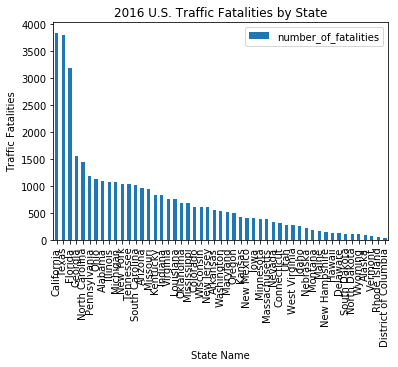

In [10]:
fatalities_by_state.plot(kind='bar')
plt.title("2016 U.S. Traffic Fatalities by State")
plt.rcParams["figure.figsize"] = [27,9]
plt.ylabel("Traffic Fatalities")
plt.xlabel("State Name")
plt.savefig("fatalities_by_state_bar_chart.png")

In [11]:
roads_by_state = pd.read_excel("SupplementalData/2016_RoadMilesByState.xls",\
                               sheet_name="RoadwaysByState",\
                               index_col=0)

In [12]:
roads_by_state.head()

,r_StateHighwayAgency,r_County,r_Town,r_OtherJurisdictions,r_FederalAgency,r_Total,u_StateHighwayAgency,u_County,u_Town,u_OtherJurisdictions,u_FederalAgency,u_Total,TotalUnreported,TotalRoadMiles
State,,,,,,,,,,,,,,
Alabama,8285.036,59093.050,6344.730,148.520,819.320,74690.656,2644.081,3077.573,20880.292,0.070,682.688,27284.704,0.0,101975.360
Alaska,4940.840,2315.632,1489.462,2311.861,1652.612,12710.407,688.042,1734.297,326.818,24.574,43.931,2817.662,0.0,15528.069
Arizona,5530.070,13571.078,2455.883,4047.116,14081.467,39685.614,1250.111,4307.837,20177.618,376.016,237.855,26349.437,0.0,66035.051
Arkansas,14087.449,64612.860,4636.520,0.000,2148.420,85485.249,2344.152,1396.010,12897.496,0.000,493.170,17130.828,0.0,102616.077
California,10258.829,56857.856,1030.415,864.046,7001.503,76012.649,4832.630,19190.555,79700.964,156.323,906.873,104787.345,0.0,180799.994


In [13]:
urban_roads_by_state = roads_by_state.drop(['r_StateHighwayAgency',\
                                           'r_County',\
                                           'r_Town',\
                                           'r_OtherJurisdictions',\
                                           'r_FederalAgency',\
                                           'r_Total',\
                                           'TotalUnreported',\
                                           'TotalRoadMiles'],\
                                           axis=1)

In [14]:
urban_roads_by_state.head()

,u_StateHighwayAgency,u_County,u_Town,u_OtherJurisdictions,u_FederalAgency,u_Total
State,,,,,,
Alabama,2644.081,3077.573,20880.292,0.070,682.688,27284.704
Alaska,688.042,1734.297,326.818,24.574,43.931,2817.662
Arizona,1250.111,4307.837,20177.618,376.016,237.855,26349.437
Arkansas,2344.152,1396.010,12897.496,0.000,493.170,17130.828
California,4832.630,19190.555,79700.964,156.323,906.873,104787.345


In [15]:
df.land_use_name.value_counts()

Urban                                18166
Rural                                16462
Trafficway Not in State Inventory      105
Unknown                                 13
Not Reported                             2
Name: land_use_name, dtype: int64

In [16]:
urban_fatalities = df[df.land_use_name == "Urban"]
urban_fatalities = urban_fatalities.set_index("state_name")
urban_fatalities_by_state = pd.pivot_table(urban_fatalities, values='number_of_fatalities',\
                      index=['state_name'], aggfunc=np.sum)

In [17]:
urban_fatalities_by_state = urban_fatalities_by_state.merge(urban_roads_by_state,\
                                left_index=True,\
                                right_index=True,\
                                how='left')

In [18]:
urban_fatalities_by_state = urban_fatalities_by_state.drop(['u_StateHighwayAgency',
                                                           'u_County',
                                                           'u_Town',
                                                           'u_OtherJurisdictions',
                                                           'u_FederalAgency'],
                                                          axis=1)

In [19]:
urban_fatalities_by_state.rename(columns={'u_Total': 'UrbanRoadMiles', 'number_of_fatalities': 'urban_fatalities'},
                                 inplace=True)

In [20]:
urban_fatalities_by_state['urban_fatalities_per_mile'] = urban_fatalities_by_state.urban_fatalities / urban_fatalities_by_state.UrbanRoadMiles
urban_fatalities_by_state.head()

,urban_fatalities,UrbanRoadMiles,urban_fatalities_per_mile
state_name,,,
Alabama,280,27284.704,0.010262
Alaska,30,2817.662,0.010647
Arizona,612,26349.437,0.023226
Arkansas,195,17130.828,0.011383
California,2244,104787.345,0.021415


In [21]:
urban_fatalities_by_state.sort_values(by=['urban_fatalities_per_mile'],
                                      ascending=False,
                                      inplace=True)

In [22]:
#Get rural road mileage data
rural_roads_by_state = roads_by_state.drop(['u_StateHighwayAgency',\
                                           'u_County',\
                                           'u_Town',\
                                           'u_OtherJurisdictions',\
                                           'u_FederalAgency',\
                                           'u_Total',\
                                           'TotalUnreported',\
                                           'TotalRoadMiles'],\
                                           axis=1)
#Get rural fatality data
rural_fatalities = df[df.land_use_name == "Rural"]
rural_fatalities = rural_fatalities.set_index("state_name")
rural_fatalities_by_state = pd.pivot_table(rural_fatalities, values='number_of_fatalities',\
                      index=['state_name'], aggfunc=np.sum)
#merge into one table
rural_fatalities_by_state = rural_fatalities_by_state.merge(rural_roads_by_state,\
                                left_index=True,\
                                right_index=True,\
                                how='left')
#drop unnecessary columns
rural_fatalities_by_state = rural_fatalities_by_state.drop(['r_StateHighwayAgency',
                                                           'r_County',
                                                           'r_Town',
                                                           'r_OtherJurisdictions',
                                                           'r_FederalAgency'],
                                                          axis=1)
#rename columns
rural_fatalities_by_state.rename(columns={'r_Total': 'RuralRoadMiles', 'number_of_fatalities': 'rural_fatalities'},
                                 inplace=True)
#calculate fatalities per mile
rural_fatalities_by_state['rural_fatalities_per_mile'] = rural_fatalities_by_state.rural_fatalities / rural_fatalities_by_state.RuralRoadMiles

#sort greatest to least
rural_fatalities_by_state.sort_values(by=['rural_fatalities_per_mile'],
                                      ascending=False,
                                      inplace=True)

rural_fatalities_by_state.head()



,rural_fatalities,RuralRoadMiles,rural_fatalities_per_mile
state_name,,,
Florida,870,36439.864,0.023875
Delaware,69,2993.940,0.023047
California,1593,76012.649,0.020957
Hawaii,25,1665.970,0.015006
New Jersey,86,5755.020,0.014943


In [23]:
state_fatalities_sum = urban_fatalities_by_state.merge(rural_fatalities_by_state,\
                                                       how='left',\
                                                       left_index=True,\
                                                       right_index=True)
state_fatalities_sum = state_fatalities_sum.fillna(0)
state_fatalities_sum['TotalRoadMiles'] = state_fatalities_sum.UrbanRoadMiles + state_fatalities_sum.RuralRoadMiles
state_fatalities_sum['RuralandUrbanFatalities'] = state_fatalities_sum.urban_fatalities + state_fatalities_sum.rural_fatalities
state_fatalities_sum['net_fatalities_per_mile'] = state_fatalities_sum.RuralandUrbanFatalities / state_fatalities_sum.TotalRoadMiles
state_fatalities_sum.sort_values(by=['net_fatalities_per_mile'],
                                      ascending=False,
                                      inplace=True)

state_fatalities_sum.head()

,urban_fatalities,UrbanRoadMiles,urban_fatalities_per_mile,rural_fatalities,RuralRoadMiles,rural_fatalities_per_mile,TotalRoadMiles,RuralandUrbanFatalities,net_fatalities_per_mile
state_name,,,,,,,,,
Hawaii,94,2802.586,0.033540,25.0,1665.970,0.015006,4468.556,119.0,0.026631
Florida,2275,86295.924,0.026363,870.0,36439.864,0.023875,122735.788,3145.0,0.025624
California,2244,104787.345,0.021415,1593.0,76012.649,0.020957,180799.994,3837.0,0.021222
Delaware,50,3433.240,0.014564,69.0,2993.940,0.023047,6427.180,119.0,0.018515
District of Columbia,26,1508.737,0.017233,0.0,0.000,0.000000,1508.737,26.0,0.017233


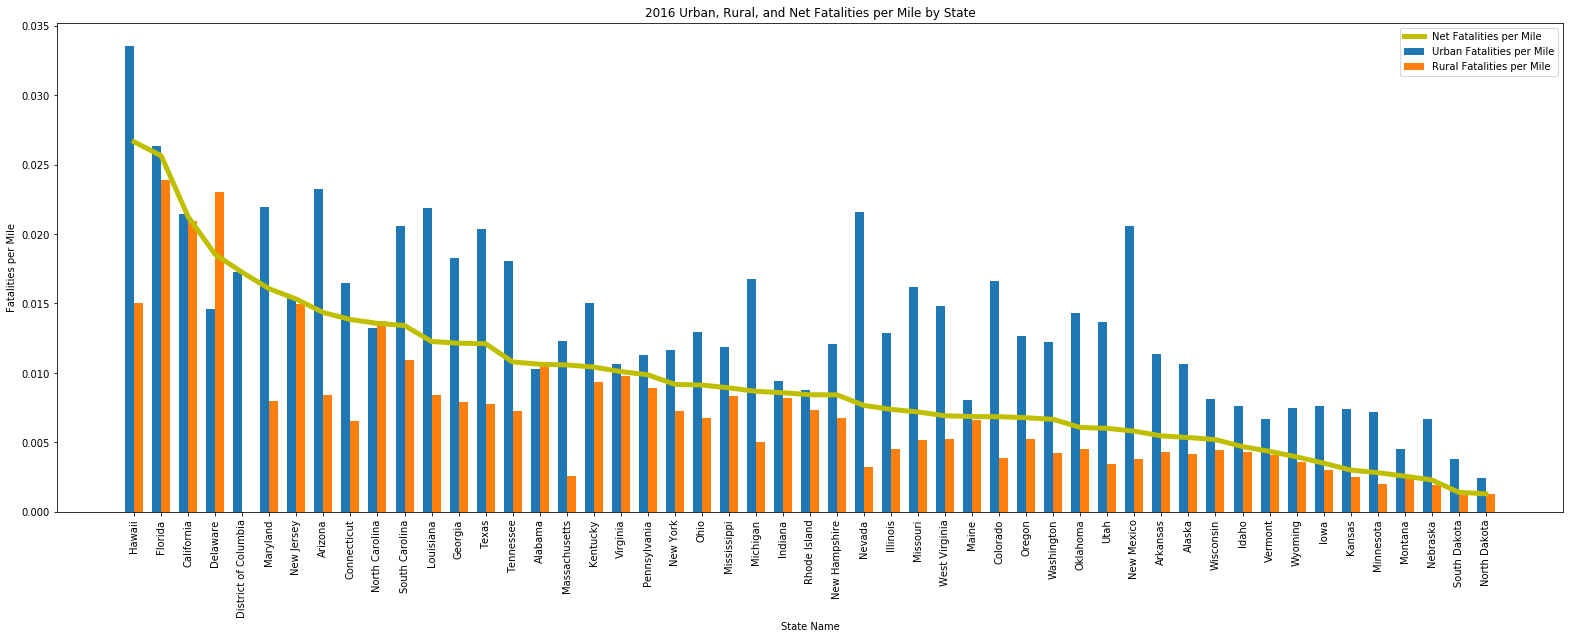

In [103]:
fig, ax = plt.subplots(1,1)
index_labels = state_fatalities_sum.index
index = range(len(index_labels))
width = np.min(np.diff(index)) / 3
urban_fatpermile = ax.bar(index - width/2,
                          state_fatalities_sum.urban_fatalities_per_mile,
                          width,
                          label='Urban Fatalities per Mile')
rural_fatpermile = ax.bar(index + width/2,
                          state_fatalities_sum.rural_fatalities_per_mile,
                          width,
                          label='Rural Fatalities per Mile')
net_fatpermile = ax.plot(index,\
                         state_fatalities_sum.net_fatalities_per_mile,\
                         color='y',\
                         linewidth=5.0,\
                         label="Net Fatalities per Mile")
ax.xaxis.set_ticks(index)
ax.axes.set_xticklabels(index_labels, rotation=90)
ax.set_ylabel("Fatalities per Mile")
ax.set_xlabel("State Name")
ax.set_title("2016 Urban, Rural, and Net Fatalities per Mile by State")
ax.legend()
fig.savefig("fatalities_by_state.png", bbox_inches='tight')
pass

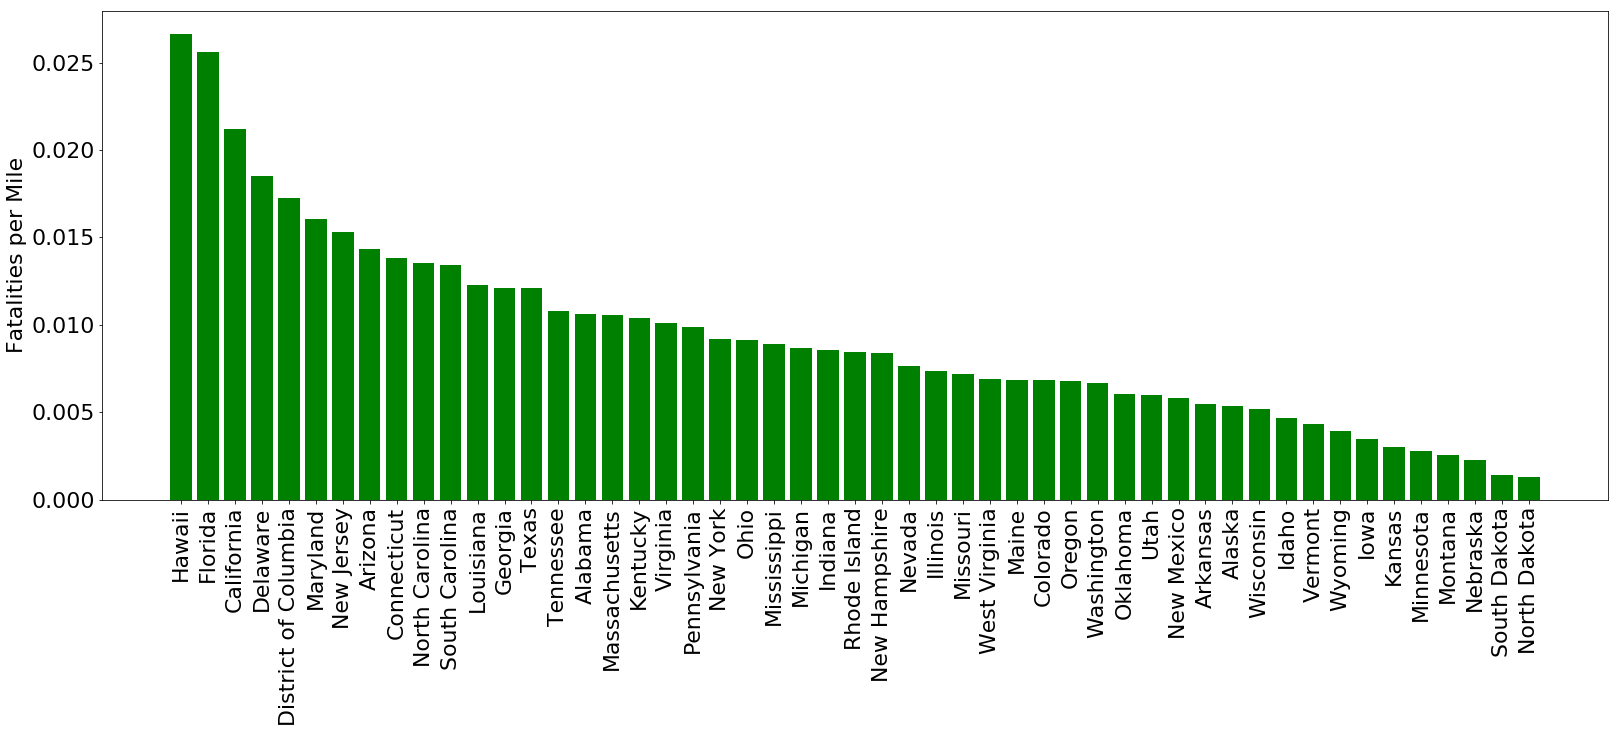

In [30]:
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(1,1)
index_labels = state_fatalities_sum.index
index = range(len(index_labels))
width = np.min(np.diff(index)) / 3
net_fatpermile = ax.bar(index,\
                         state_fatalities_sum.net_fatalities_per_mile,\
                         color='g',\
                         linewidth=5.0,\
                         label="Net Fatalities per Mile")
ax.xaxis.set_ticks(index)
ax.axes.set_xticklabels(index_labels, rotation=90)
ax.set_ylabel("Fatalities per Mile")
fig.savefig("net_fatalities_by_state.png", bbox_inches='tight')
pass

In [51]:
states = ['District of Columbia','Florida', 'California', 'Delaware', 'Hawaii']
df = state_fatalities_sum.filter(items=states, axis=0)
df

,urban_fatalities,UrbanRoadMiles,urban_fatalities_per_mile,rural_fatalities,RuralRoadMiles,rural_fatalities_per_mile,TotalRoadMiles,RuralandUrbanFatalities,net_fatalities_per_mile
state_name,,,,,,,,,
District of Columbia,26,1508.737,0.017233,0.0,0.000,0.000000,1508.737,26.0,0.017233
Florida,2275,86295.924,0.026363,870.0,36439.864,0.023875,122735.788,3145.0,0.025624
California,2244,104787.345,0.021415,1593.0,76012.649,0.020957,180799.994,3837.0,0.021222
Delaware,50,3433.240,0.014564,69.0,2993.940,0.023047,6427.180,119.0,0.018515
Hawaii,94,2802.586,0.033540,25.0,1665.970,0.015006,4468.556,119.0,0.026631


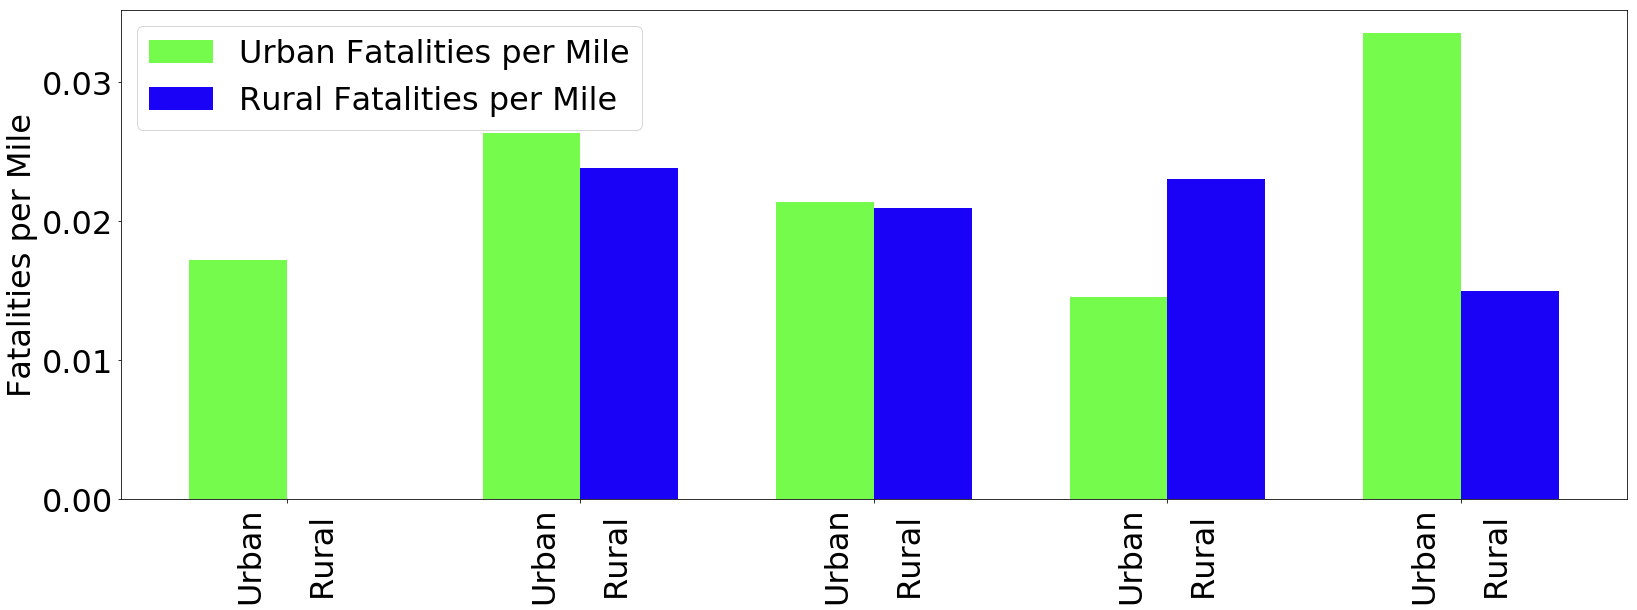

In [55]:
plt.rcParams.update({'font.size': 32})
fig, ax = plt.subplots(1,1)
index_labels = df.index
index = range(len(index_labels))
width = np.min(np.diff(index)) / 3
urban_fatpermile = ax.bar(index - width/2,
                          df.urban_fatalities_per_mile,
                          width,
                          color='#75FB4C',
                          label='Urban Fatalities per Mile')
rural_fatpermile = ax.bar(index + width/2,
                          df.rural_fatalities_per_mile,
                          width,
                          color='#1902F5',
                          label='Rural Fatalities per Mile')
ax.xaxis.set_ticks(index)
ax.axes.set_xticklabels(['Urban\n\nRural','Urban\n\nRural','Urban\n\nRural','Urban\n\nRural','Urban\n\nRural'], rotation=90)
ax.set_ylabel("Fatalities per Mile")
ax.legend()
fig.savefig("top5_urbanrural.png", bbox_inches='tight')
pass